<a href="https://colab.research.google.com/github/Sanarazaaa/Academic-Performance-Exercise-and-ADHD/blob/main/Academic_Performance_Exercise_and_ADHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [5]:
   from google.colab import files
   uploaded = files.upload()


Saving FitbitsAndGradesData_Fall2017.csv to FitbitsAndGradesData_Fall2017 (1).csv


In [7]:
import pandas as pd

# Load the dataset (make sure to provide the correct path)
data = pd.read_csv('FitbitsAndGradesData_Fall2017.csv')  # Replace with your actual file path

# Inspect the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Get basic statistics
print(data.describe())

   Key  Steps  Peak  Cardio  FatBurn  Mode  Minutes  Gender  Age   GPA  \
0    1  11157  0.13    3.86   111.92     1     9.35       1   23  4.00   
1    2   7986  2.72   15.53   249.29     1     8.20       1   18  3.26   
2    3  11602  0.35    2.10   195.32     0    12.73       0   18  3.07   
3    4  10609  1.00    6.51   121.75     1    10.00       1   17  4.00   
4    5  14552  9.10    6.09   109.66     1     8.63       0   18  2.87   

   Life Score  
0          48  
1         101  
2          64  
3          41  
4          83  
Key           0
Steps         0
Peak          0
Cardio        0
FatBurn       0
Mode          0
Minutes       0
Gender        0
Age           0
GPA           0
Life Score    0
dtype: int64
              Key         Steps        Peak      Cardio     FatBurn  \
count  581.000000    581.000000  581.000000  581.000000  581.000000   
mean   291.000000  10229.024096    2.862960    9.007694  148.726454   
std    167.864529   3067.141829   14.150403   16.465780  

In [10]:
print(data['GPA'].isnull().sum())

# Fill missing GPA values with the mean (using the recommended approach)
data['GPA'] = data['GPA'].fillna(data['GPA'].mean())

# Alternatively, using loc
# data.loc[data['GPA'].isnull(), 'GPA'] = data['GPA'].mean()

# Convert 'Gender' to categorical if necessary
data['Gender'] = data['Gender'].astype('category')

# Check the updated DataFrame
print(data.head())

0
   Key  Steps  Peak  Cardio  FatBurn  Mode  Minutes Gender  Age   GPA  \
0    1  11157  0.13    3.86   111.92     1     9.35      1   23  4.00   
1    2   7986  2.72   15.53   249.29     1     8.20      1   18  3.26   
2    3  11602  0.35    2.10   195.32     0    12.73      0   18  3.07   
3    4  10609  1.00    6.51   121.75     1    10.00      1   17  4.00   
4    5  14552  9.10    6.09   109.66     1     8.63      0   18  2.87   

   Life Score  
0          48  
1         101  
2          64  
3          41  
4          83  


In [11]:
# Descriptive statistics for physical activity
physical_activity_stats = data[['Steps', 'Peak', 'Cardio', 'FatBurn', 'Minutes']].describe()
print(physical_activity_stats)

# Descriptive statistics for GPA
gpa_stats = data['GPA'].describe()
print(gpa_stats)

              Steps        Peak      Cardio     FatBurn     Minutes
count    581.000000  581.000000  581.000000  581.000000  581.000000
mean   10229.024096    2.862960    9.007694  148.726454   10.161015
std     3067.141829   14.150403   16.465780   96.495032    3.139881
min        0.000000    0.000000    0.000000    0.000000    5.380000
25%     8506.000000    0.250000    2.340000   82.430000    7.670000
50%    10284.000000    0.760000    4.600000  122.000000    9.350000
75%    12082.000000    2.020000    8.950000  189.690000   12.150000
max    20331.000000  267.100000  180.650000  729.670000   21.070000
count    581.000000
mean       3.186919
std        0.757748
min        0.000000
25%        2.840000
50%        3.350000
75%        3.780000
max        4.000000
Name: GPA, dtype: float64


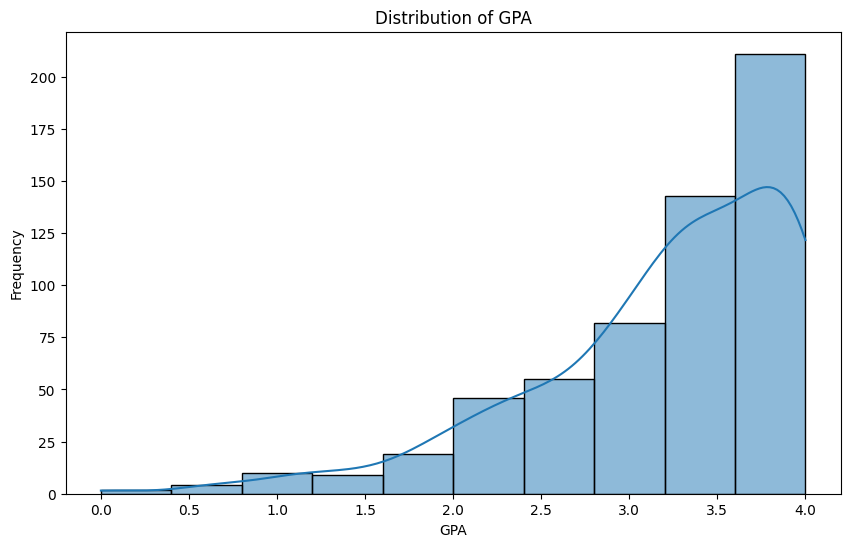

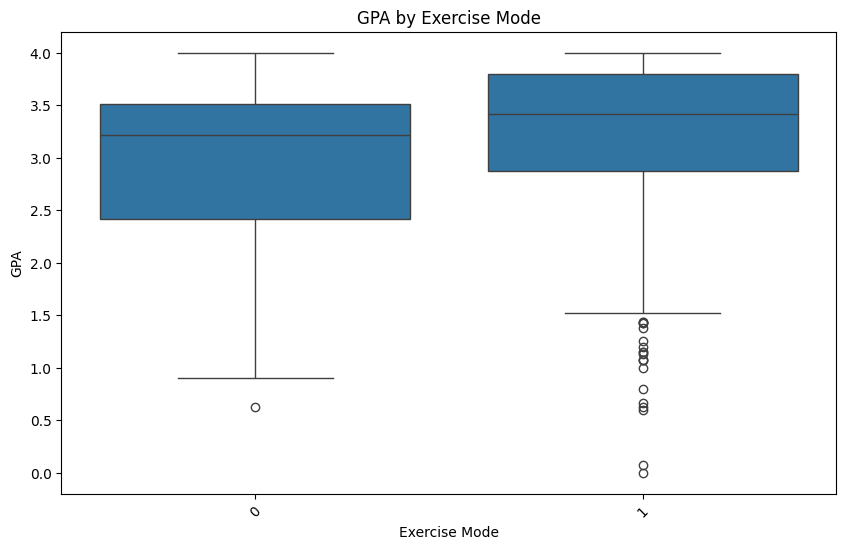

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of GPA
plt.figure(figsize=(10, 6))
sns.histplot(data['GPA'], bins=10, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

# Box plot of GPA by exercise mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mode', y='GPA', data=data)
plt.title('GPA by Exercise Mode')
plt.xlabel('Exercise Mode')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.isnull().sum())

Institute     2
Gender        2
Age1          2
Age           2
MS            2
Kids          2
Ex1           2
Experience    2
Q1            2
Q2            2
DS1           2
DS2           2
NS            2
TSW           2
ANS           2
RT            2
RH            2
VS            2
PN            2
C1            2
C2            2
C3            2
C4            2
C5            2
C6            2
C7            2
PSQI          2
SQ            2
HRS           2
HRB           2
CS            2
TS            2
ME            2
MEC           2
MOE           2
MOEC          2
SE            2
SEC           2
dtype: int64


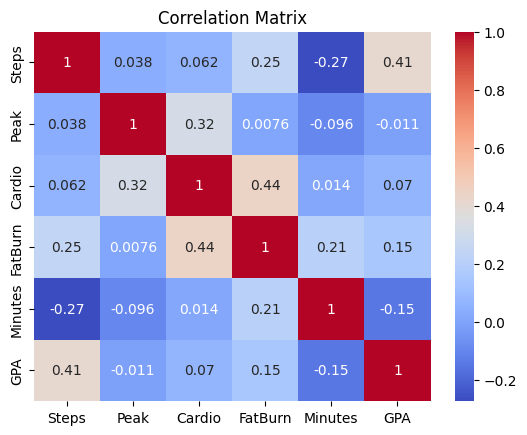

In [13]:
# Correlation matrix
correlation_matrix = data[['Steps', 'Peak', 'Cardio', 'FatBurn', 'Minutes', 'GPA']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Example: T-test comparing GPA of those who exercise more than the median minutes vs. those who do not
median_minutes = data['Minutes'].median()
high_exercise = data[data['Minutes'] > median_minutes]['GPA']
low_exercise = data[data['Minutes'] <= median_minutes]['GPA']

from scipy import stats

t_stat, p_value = stats.ttest_ind(high_exercise, low_exercise)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Statistical Significance: Since the p-value (0.0025) is less than the common alpha level of 0.05, you can conclude that there is a statistically significant difference in GPA between adolescents who engage in high levels of exercise and those who do not.
# Direction of the Effect: The negative t-statistic suggests that the group with lower exercise levels has a higher GPA on average compared to the high-exercise group. This could indicate that, in your sample, those who exercise more may have lower GPAs, but further investigation is needed to understand the underlying reasons.

T-statistic: -3.0399321060289033, P-value: 0.002473204291445334


In [15]:
import statsmodels.api as sm

# Define independent variables (physical activity metrics)
X = data[['Steps', 'Peak', 'Cardio', 'FatBurn', 'Minutes']]
X = sm.add_constant(X)  # Add constant for intercept

# Define dependent variable (GPA)
y = data['GPA']

# Fit regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     24.55
Date:                Thu, 28 Nov 2024   Prob (F-statistic):           1.93e-22
Time:                        21:50:33   Log-Likelihood:                -606.52
No. Observations:                 581   AIC:                             1225.
Df Residuals:                     575   BIC:                             1251.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2884      0.161     14.246      0.0